In [1]:
# Create Training Data set and Labels

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score

In [28]:
x11 = np.random.rand(400,1)
x12 = 4*np.random.rand(400,1)

x21 = 2*np.random.rand(400,1)
x22 = 2*np.random.rand(400,1)

x3 = np.ones((400,1))

xD1 = np.hstack((x12,x11,x3)) # Dataset 1
xD2 = np.hstack((x22,x11,x3)) # Dataset 2

w1 = np.array([[1],[4],[-4]]) # weight to define label 1
w2 = np.array([[1],[1],[-2]]) # weight to define label 2

y1 = (np.sign(np.dot(xD1,w1))+1)/2 # label for dataset 1
y2 = (np.sign(np.dot(xD2,w2))+1)/2 # label for dataset 2

In [33]:
# Initializations and definitions

In [38]:
def weightInitialization(num_features):
    w = np.zeros((num_features,1))
    return w

def sigmoid_function(x):
    result = 1/(1 + np.exp(-x))
    return x

def model_optimize(w, x, y):
    n = x.shape[0]
    
    # Evaluating cost value
    result = sigmoid_function(np.dot(x,w))
    cost = (-1/m)*(np.sum((y*np.log(result) + (1-y)*np.log(1-result))))
    
    # Gradient calculation
    dw = (1/n)*(np.dot(x.T,(result-y)))
    return dw,cost


In [54]:
def model_predict(w,x,y,learning_rate,num_iterations):
    costs = []
    for i in range(num_iterations):
        
        dw, cost = model_optimize(w,x,y)
        
        w = w - (learning_rate)*dw
        
        if (i%1000 == 0):
            costs.append(cost)
            print("Cost after iteration %i is : %f" % (i,cost))
            
    coeff = w
    gradient = dw
    
    return w,dw,costs

def predict(final_pred, m):
    y_pred = np.zeros((m,1))
    for i in range(final_pred.shape[0]):
        if (final_pred[i][0] > 0.5):
            y_pred[i][0] = 1
    
    return y_pred

In [83]:
num_features = xD1.shape[1]
m = xD1.shape[0]
print("number of features is %i" % num_features)

w = weightInitialization(num_features)

w, grad, costs = model_predict(w, xD1, y1, learning_rate=0.0001, num_iterations=23000)

final_pred = sigmoid_function(np.dot(xD1,w))

y_pred = predict(final_pred, m)

print("weight vector final is", w)

print("Training accuracy is", accuracy_score(y_pred, y1))

number of features is 3
Cost after iteration 0 is : nan
Cost after iteration 1000 is : 0.712636
Cost after iteration 2000 is : 0.570192
Cost after iteration 3000 is : 0.527975
Cost after iteration 4000 is : 0.512310
Cost after iteration 5000 is : 0.505092


/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


Cost after iteration 6000 is : 0.500789
Cost after iteration 7000 is : 0.497581
Cost after iteration 8000 is : 0.494836
Cost after iteration 9000 is : 0.492315
Cost after iteration 10000 is : 0.489921
Cost after iteration 11000 is : 0.487606
Cost after iteration 12000 is : 0.485349
Cost after iteration 13000 is : 0.483137
Cost after iteration 14000 is : 0.480963
Cost after iteration 15000 is : 0.478824
Cost after iteration 16000 is : 0.476715
Cost after iteration 17000 is : 0.474636
Cost after iteration 18000 is : 0.472585
Cost after iteration 19000 is : 0.470560
Cost after iteration 20000 is : 0.468562
Cost after iteration 21000 is : 0.466589
Cost after iteration 22000 is : 0.464640
weight vector final is [[0.2017571 ]
 [0.18792866]
 [0.02216106]]
Training accuracy is 0.8


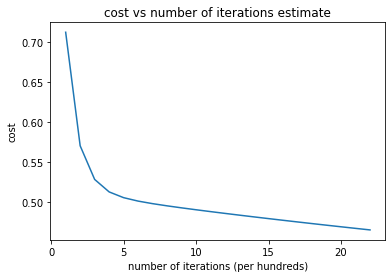

In [84]:
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("number of iterations (per hundreds)")
plt.title("cost vs number of iterations estimate")
plt.show()